In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.cm import ScalarMappable
%matplotlib widget

import importlib
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import ExperimentClass
import tools
import math_functions as mf


In [2]:
importlib.reload(ExperimentClass)
importlib.reload(tools)
importlib.reload(mf)

<module 'math_functions' from 'c:\\Users\\Orlando\\Desktop\\DREAM_repo\\math_functions.py'>

In [3]:
import ast
import re

def fix_number_format(value):
    if isinstance(value, str):
        # Add a comma after an integer followed by a float
        value = re.sub(r'(\d+)\.\s+(\d)', r'\1., \2', value)
        
        # Add commas between numbers wherever necessary
        value = re.sub(r'(?<=\d)\s+(?=[\d\.])', ', ', value)
    return value

def convert_to_list(value):
    if isinstance(value, str):
        try:
            return ast.literal_eval(value)
        except Exception as e:
            print(f"Error converting value: {value}, error: {e}")
            return value
    return value

# Apply this function to the relevant columns
columns_to_convert = ['F_max', 'F_stat', 'phi_stat', 'NPQ', 'ETR']


In [4]:

names = ["20241027_activation_Pt2_morning_control", "20241027_activation_Pt2_morning_bicarbonate", "20241025_activation_Pt2_afternoon_control", "20241025_activation_Pt2_afternoon_bicarbonate"]

conditions = ["Pt2 morning control", "Pt2 morning bicarbonate", "Pt2 afternoon control", "Pt2 afternoon bicarbonate"]

results = []
for name in names:
    path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/params.csv"
    df = pd.read_csv(path, index_col= False, sep=";")
    for col in columns_to_convert:
        df[col] = df[col].apply(fix_number_format)
        df[col] = df[col].apply(convert_to_list)
    results.append(df)

fig_folder = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + names[-1] + "/compare/"
if not os.path.exists(fig_folder):
    os.makedirs(fig_folder)
    
times_Fmax = [20, 80, 140, 200]


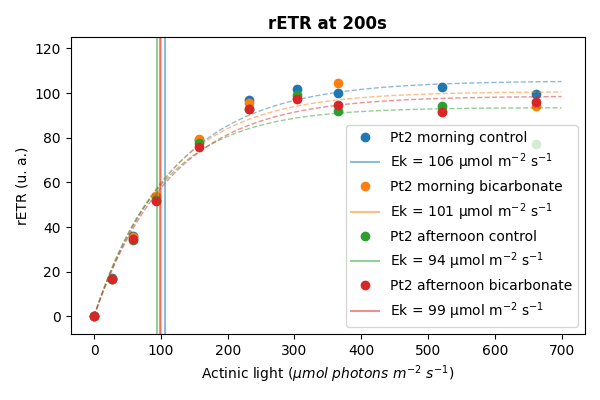

In [5]:

time = 200

Ek = []

fig, ax = plt.subplots(figsize = (6, 4))
conditions_to_compare = ["Pt2 morning control", "Pt2 morning bicarbonate", "Pt2 afternoon control", "Pt2 afternoon bicarbonate"]
ax.set_ylim(-8, 125)
for condition in conditions_to_compare:
    i = conditions.index(condition)
    ETR_matrix = np.asarray(results[i].ETR.tolist())
    ETR = ETR_matrix[:, times_Fmax.index(time)]
    light = results[i].Actinic.tolist()
    ax.plot(light, ETR, 'o', label = condition, color = f"C{i}")
    popt, pcov, xfit, yfit = tools.Ek_fit(light, ETR, 0, 700, 100, p0 = [100, 100])
    Ek.append(popt[0])
    ax.plot(xfit, yfit, '--', linewidth = 1, color = f"C{i}", alpha = 0.5)    
    ax.axvline(x=Ek[-1], linewidth=1.5, color = f"C{i}", alpha = 0.5, label = f"Ek = {Ek[-1]:.0f} µmol m$^{{-2}}$ s$^{{-1}}$")

ax.legend()
ax.set_xlabel("Actinic light ($µmol$ $photons$ $m^{-2}$ $s^{-1}$)")
ax.set_ylabel("rETR (u. a.)")
ax.set_ylim(-8, 125)
ax.set_title(f"rETR at {time}s", fontsize = 12, fontweight = 'bold')
fig.tight_layout()




fig.savefig(f"{fig_folder}/ETR_{time}s.png", dpi=300)

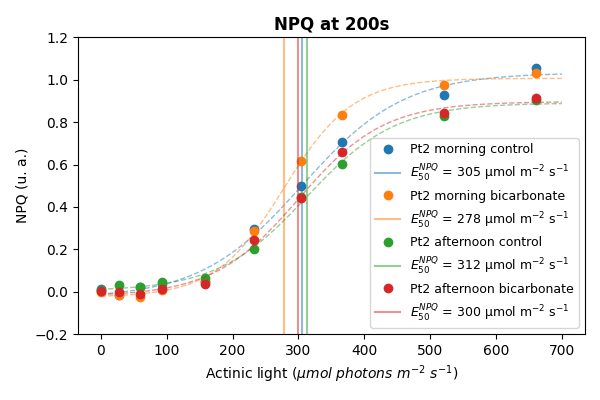

In [6]:
time = 200
fig, ax = plt.subplots(figsize = (6, 4))

ax.set_ylim(-0.2, 1.2)

for condition in conditions:
    i = conditions.index(condition)
    NPQ_matrix = np.asarray(results[i].NPQ.tolist())
    NPQ = NPQ_matrix[:, times_Fmax.index(time)]
    light = results[i].Actinic.tolist()
    ax.plot(light, NPQ, 'o', label = condition, color = f"C{i}")
    popt, pcov, xfit, yfit = tools.sigmoid_fit(light, NPQ, 0, 700, 100, p0 =  [1, 0.02, 300, 0])
    E50NPQ = popt[2]
    ax.plot(xfit, yfit, '--', linewidth = 1, color = f"C{i}", alpha = 0.5)
    ax.axvline(x=popt[2], linewidth=1.5, color = f"C{i}", alpha = 0.5, label = f"$E_{{50}}^{{NPQ}}$ = {E50NPQ:.0f} µmol m$^{{-2}}$ s$^{{-1}}$")

ax.legend(fontsize = 9)
ax.set_xlabel("Actinic light ($µmol$ $photons$ $m^{-2}$ $s^{-1}$)")
ax.set_ylabel("NPQ (u. a.)")

ax.set_title(f"NPQ at {time}s", fontsize = 12, fontweight = 'bold')
fig.tight_layout()

fig.savefig(f"{fig_folder}/NPQ_{time}s_all.png", dpi=300)

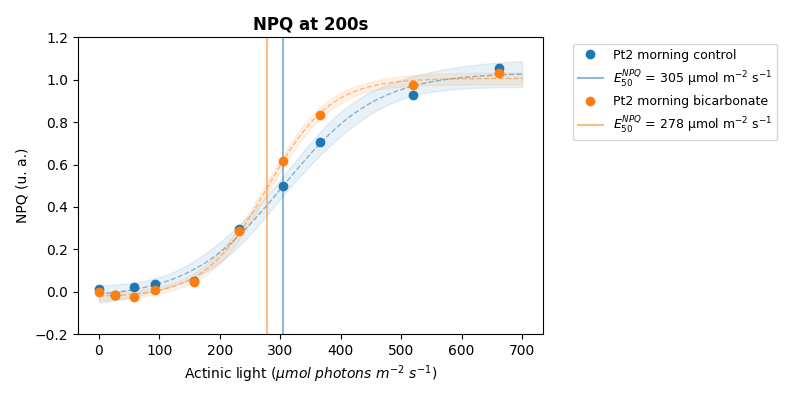

In [7]:
time = 200
fig, ax = plt.subplots(figsize = (8, 4))

ax.set_ylim(-0.2, 1.2)

conditions_to_compare = ["Pt2 morning control", "Pt2 morning bicarbonate"]

for condition in conditions_to_compare:
    i = conditions.index(condition)
    NPQ_matrix = np.asarray(results[i].NPQ.tolist())
    NPQ = NPQ_matrix[:, times_Fmax.index(time)]
    light = results[i].Actinic.tolist()
    ax.plot(light, NPQ, 'o', label = condition, color = f"C{i}")
    popt, pcov, xfit, yfit = tools.sigmoid_fit(light, NPQ, 0, 700, 100, p0 =  [1, 0.02, 300, 0])
    err = tools.my_err(xfit, popt, pcov, mf.sigmoid)
    ax.fill_between(xfit, yfit - 1.94*err, yfit + 1.94*err, alpha=0.1, color = f"C{i}")
    E50NPQ = popt[2]
    ax.plot(xfit, yfit, '--', linewidth = 1, color = f"C{i}", alpha = 0.5)
    ax.axvline(x=popt[2], linewidth=1.5, color = f"C{i}", alpha = 0.5, label = f"$E_{{50}}^{{NPQ}}$ = {E50NPQ:.0f} µmol m$^{{-2}}$ s$^{{-1}}$")

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 9)
ax.set_xlabel("Actinic light ($µmol$ $photons$ $m^{-2}$ $s^{-1}$)")
ax.set_ylabel("NPQ (u. a.)")

ax.set_title(f"NPQ at {time}s", fontsize = 12, fontweight = 'bold')
fig.tight_layout()

fig.savefig(f"{fig_folder}/NPQ_{time}s_all.png", dpi=300)

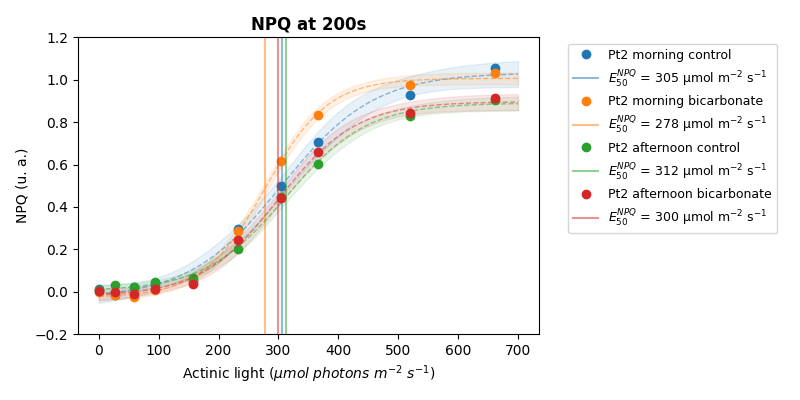

In [8]:
time = 200
fig, ax = plt.subplots(figsize = (8, 4))

ax.set_ylim(-0.2, 1.2)

for condition in conditions:
    i = conditions.index(condition)
    NPQ_matrix = np.asarray(results[i].NPQ.tolist())
    NPQ = NPQ_matrix[:, times_Fmax.index(time)]
    light = results[i].Actinic.tolist()
    ax.plot(light, NPQ, 'o', label = condition, color = f"C{i}")
    popt, pcov, xfit, yfit = tools.sigmoid_fit(light, NPQ, 0, 700, 100, p0 =  [1, 0.02, 300, 0])
    err = tools.my_err(xfit, popt, pcov, mf.sigmoid)
    ax.fill_between(xfit, yfit - 1.94*err, yfit + 1.94*err, alpha=0.1, color = f"C{i}")
    E50NPQ = popt[2]
    ax.plot(xfit, yfit, '--', linewidth = 1, color = f"C{i}", alpha = 0.5)
    ax.axvline(x=popt[2], linewidth=1.5, color = f"C{i}", alpha = 0.5, label = f"$E_{{50}}^{{NPQ}}$ = {E50NPQ:.0f} µmol m$^{{-2}}$ s$^{{-1}}$")

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 9)
ax.set_xlabel("Actinic light ($µmol$ $photons$ $m^{-2}$ $s^{-1}$)")
ax.set_ylabel("NPQ (u. a.)")

ax.set_title(f"NPQ at {time}s", fontsize = 12, fontweight = 'bold')
fig.tight_layout()

fig.savefig(f"{fig_folder}/NPQ_{time}s_all.png", dpi=300)

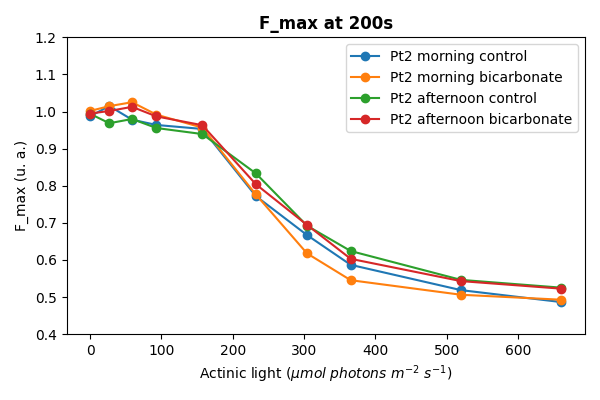

In [9]:
time = 200
fig, ax = plt.subplots(figsize = (6, 4))

ax.set_ylim(0.4, 1.2)

for condition in conditions:
    i = conditions.index(condition)
    F_max_matrix = np.asarray(results[i].F_max.tolist())
    F_max = F_max_matrix[:, times_Fmax.index(time)]
    light = results[i].Actinic.tolist()
    ax.plot(light, F_max, 'o-', label = condition, color = f"C{i}")
 

ax.legend()
ax.set_xlabel("Actinic light ($µmol$ $photons$ $m^{-2}$ $s^{-1}$)")
ax.set_ylabel("F_max (u. a.)")
ax.set_title(f"F_max at {time}s", fontsize = 12, fontweight = 'bold')
fig.tight_layout()

fig.savefig(f"{fig_folder}/F_max_{time}s_all.png", dpi=300)

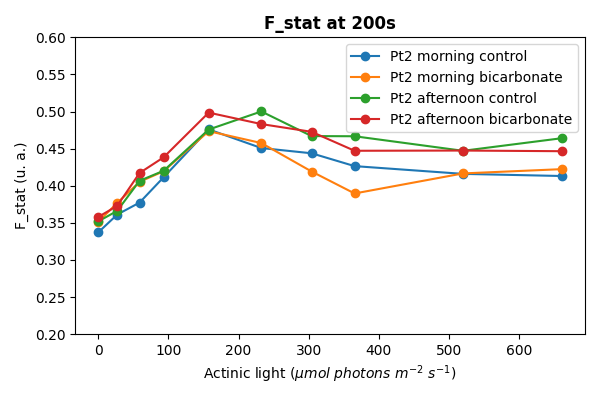

In [10]:
time = 200
fig, ax = plt.subplots(figsize = (6, 4))
ax.set_ylim(0.2, 0.6)
for condition in conditions:
    i = conditions.index(condition)
    F_stat_matrix = np.asarray(results[i].F_stat.tolist())
    F_stat = F_stat_matrix[:, times_Fmax.index(time)]
    light = results[i].Actinic.tolist()
    ax.plot(light, F_stat, 'o-', label = condition, color = f"C{i}") 

ax.legend()
ax.set_xlabel("Actinic light ($µmol$ $photons$ $m^{-2}$ $s^{-1}$)")
ax.set_ylabel("F_stat (u. a.)")
ax.set_title(f"F_stat at {time}s", fontsize = 12, fontweight = 'bold')
fig.tight_layout()

fig.savefig(f"{fig_folder}/F_stat_{time}s_all.png", dpi=300)

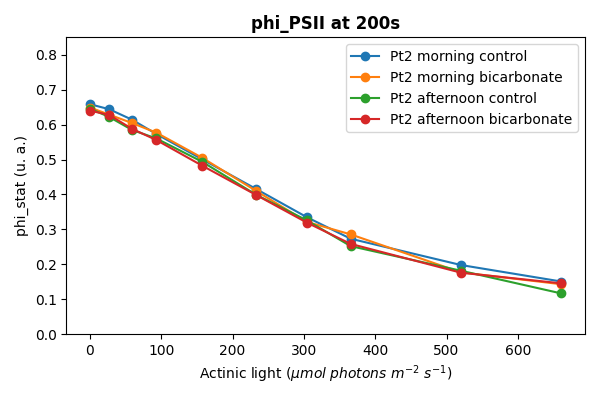

In [11]:
time = 200
fig, ax = plt.subplots(figsize = (6, 4))

for condition in conditions:
    i = conditions.index(condition)
    phi_stat_matrix = np.asarray(results[i].phi_stat.tolist())
    phi_stat = phi_stat_matrix[:, times_Fmax.index(time)]
    light = results[i].Actinic.tolist()
    ax.plot(light, phi_stat, 'o-', label = condition, color = f"C{i}")

ax.legend()
ax.set_xlabel("Actinic light ($µmol$ $photons$ $m^{-2}$ $s^{-1}$)")
ax.set_ylabel("phi_stat (u. a.)")
ax.set_ylim(0, 0.85)
ax.set_title(f"phi_PSII at {time}s", fontsize = 12, fontweight = 'bold')
fig.tight_layout()

fig.savefig(f"{fig_folder}/phi_stat_{time}s_all.png", dpi=300)